In [1]:
import tensorflow as tf
import pandas as pd

In [2]:
# !wget https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/insurance.csv

In [3]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
# we have to turn non- numerical values to numerical
insurance_onehot = pd.get_dummies(insurance)
insurance_onehot

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,False,True,True,False,False,True,False,False
1334,18,31.920,0,2205.98080,True,False,True,False,True,False,False,False
1335,18,36.850,0,1629.83350,True,False,True,False,False,False,True,False
1336,21,25.800,0,2007.94500,True,False,True,False,False,False,False,True


In [5]:
# create x, y for feeding
x = insurance_onehot.drop("charges", axis=1) # besically everything other than charges
y = insurance_onehot["charges"]

In [6]:
y.head()

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520


In [7]:
# create training and test sets
from sklearn.model_selection import train_test_split # very very populer
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
len(x), len(x_train), len(x_test)

(1338, 1070, 268)

In [ ]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"]
)

model.fit(x_train, y_train, epochs=100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 10045.3438 - mae: 10045.3438   
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7693.5269 - mae: 7693.5269  
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7868.9487 - mae: 7868.9487 
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7479.6069 - mae: 7479.6069 
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7396.3672 - mae: 7396.3672 
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7677.7495 - mae: 7677.7495 
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7370.1558 - mae: 7370.1558 
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7856.1812 - mae: 7856.1812 
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7645.3252 - mae: 7645.3252 
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7631.1206 - mae: 7631.1206 
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7399.6191 - mae: 7399.6191 
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━

In [ ]:
" we don't have even converted pandas to numpy. reason is pandas is on top of numpy. what we see as pandas df is under the hood is numpy and terdorflow knows how to handle numpy"

In [ ]:
model.evaluate(x_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8400.3301 - mae: 8400.3301 


[8390.458984375, 8390.458984375]

In [ ]:
# mae is off by ±8400. where the mean value is 12k
y_test.mean(), y_test.median()
# that mean we need to charge 12k but charging 8k off => 4k only.

(np.float64(12968.317062869404), 8487.8803)

## TO (try) Improving model
1. add an extra layer with more hidden unit
2. train for longer -> 200 epoches

In [19]:
tf.random.set_seed(42)

# mae nan mean our model is too complex to learn anything.
# there is not enough data compared to the model complexity
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_2.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["mae"]
)

model_2.fit(x_train, y_train, epochs=100, verbose=1)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 13254.0957 - mae: 13254.0957
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13101.9395 - mae: 13101.9395
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12797.9707 - mae: 12797.9707
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12204.6855 - mae: 12204.6855
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11180.5195 - mae: 11180.5195
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9775.7441 - mae: 9775.7441
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8358.7354 - mae: 8358.7354
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7528.3027 - mae: 7528.3027
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7382.5283 - mae: 7382.5283
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7354.7051 - mae: 7354.7051
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7333.2461 - mae: 7333.2461
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s

In [17]:
model_2.evaluate(x_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5008.5273 - mae: 5008.5273  


[4862.095703125, 4862.095703125]

## model 3

In [20]:
tf.random.set_seed(42)

# mae nan mean our model is too complex to learn anything.
# there is not enough data compared to the model complexity
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["mae"]
)

model_3.fit(x_train, y_train, epochs=200, verbose=1)

Epoch 1/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 13264.2910 - mae: 13264.2910
Epoch 2/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 13132.8467 - mae: 13132.8467
Epoch 3/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 12868.2627 - mae: 12868.2627
Epoch 4/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 12327.1045 - mae: 12327.1045
Epoch 5/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11357.5400 - mae: 11357.5400
Epoch 6/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9975.9580 - mae: 9975.9580  
Epoch 7/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8532.0713 - mae: 8532.0713
Epoch 8/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7605.8950 - mae: 7605.8950
Epoch 9/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 7406.2944 - mae: 7406.2944
Epoch 10/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7372.1948 - mae: 7372.1948
Epoch 11/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7351.5239 - mae: 7351.5239
Epoch 12/200
34/34 ━━━━━━━━━━━━━━━━━━━━

In [24]:
model_3.evaluate(x_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3482.2681 - mae: 3482.2681 


[3415.085205078125, 3415.085205078125]

## Model 4

In [22]:
tf.random.set_seed(42)

# mae nan mean our model is too complex to learn anything.
# there is not enough data compared to the model complexity
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_4.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["mae"]
)

history = model_4.fit(x_train, y_train, epochs=300, verbose=1)

Epoch 1/300
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 13274.6436 - mae: 13274.6436
Epoch 2/300
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 13141.3896 - mae: 13141.3896
Epoch 3/300
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12869.6631 - mae: 12869.6631
Epoch 4/300
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12311.1436 - mae: 12311.1436
Epoch 5/300
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11315.9307 - mae: 11315.9307
Epoch 6/300
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9929.8818 - mae: 9929.8818  
Epoch 7/300
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8504.9209 - mae: 8504.9209
Epoch 8/300
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7613.9517 - mae: 7613.9517
Epoch 9/300
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7429.8584 - mae: 7429.8584
Epoch 10/300
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7397.1543 - mae: 7397.1543
Epoch 11/300
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7375.9004 - mae: 7375.9004
Epoch 12/300
34/34 ━━━━━━━━━━━━━━━━━━━━ 

In [23]:
model_4.evaluate(x_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3211.0601 - mae: 3211.0601  


[3164.984130859375, 3164.984130859375]

## History plot

In [28]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'loss')

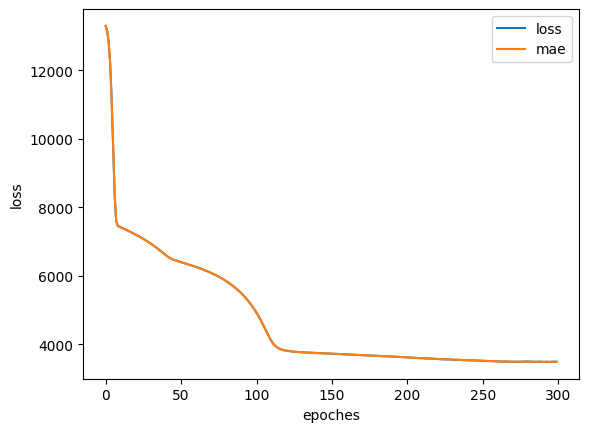

In [30]:
pd.DataFrame(history.history).plot()
plt.xlabel("epoches")
plt.ylabel("loss")

In [ ]:
"""
after few epoches there is a certrain decrease in losses
again after a fix point decrease of losses has slowed down.
so will be a point after that our improvement will be a straint line
what is what called `Early Stoping call back`
"""

## Model 5
- improve the learning rate

In [34]:
tf.random.set_seed(42)

# mae nan mean our model is too complex to learn anything.
# there is not enough data compared to the model complexity
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_5.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=["mae"]
)

history = model_5.fit(x_train, y_train, epochs=300, verbose=1)

Epoch 1/300
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 12671.9785 - mae: 12671.9785
Epoch 2/300
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7609.3564 - mae: 7609.3564
Epoch 3/300
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7263.9487 - mae: 7263.9487
Epoch 4/300
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7057.7319 - mae: 7057.7319
Epoch 5/300
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6804.2007 - mae: 6804.2007
Epoch 6/300
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6476.1816 - mae: 6476.1816
Epoch 7/300
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6273.4307 - mae: 6273.4307
Epoch 8/300
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6132.5029 - mae: 6132.5029
Epoch 9/300
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6001.0664 - mae: 6001.0664
Epoch 10/300
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5808.4956 - mae: 5808.4956
Epoch 11/300
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5561.0425 - mae: 5561.0425
Epoch 12/300
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/ste

In [33]:
model_5.evaluate(x_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3232.9504 - mae: 3232.9504  


[3174.231201171875, 3174.231201171875]

Text(0, 0.5, 'loss')

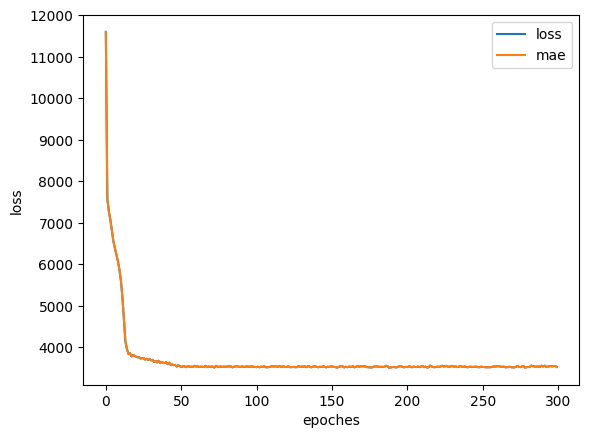

In [35]:
pd.DataFrame(history.history).plot()
plt.xlabel("epoches")
plt.ylabel("loss")

In [ ]:
# see how stedy the improvement is !!
# what's where we can stop our training